# IPL Dataset (2008-2019)

Here, I have used the IPL dataset from 2008 to 2019 from kaggle for Data analysis and visualization with python and the libararies in it. 

About the Dataset :

IPL i.e Indian Premier League is a T20 cricket format in India. It is played between April and May every Year. It was founded by BCCI in 2008.

This dataset contains(2 csv files):
* matches.csv 
* deliveries.csv

## Downloading the Dataset

To download the dataset, I have used the opendatasets python library which will download the IPL dataset from kaggle.

In [1]:
!pip install jovian opendatasets --upgrade --quiet

Let's begin by downloading the data, and listing the files within the dataset.

In [2]:
# url for the dataset
dataset_url = 'https://www.kaggle.com/nowke9/ipldata' 

In [3]:
import opendatasets as od
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: pravinkumar97
Your Kaggle Key: ········


100%|██████████| 1.20M/1.20M [00:00<00:00, 22.1MB/s]

The dataset has been downloaded and extracted.

In [4]:
# Listing the files into the directory
data_dir = './ipldata'

In [5]:
import os
os.listdir(data_dir)

['deliveries.csv', 'matches.csv']

## Data Preparation and Cleaning

Lets load the CSV files using the pandas library. Pandas library is a very efficient library for loading, preparing and cleaning purposes. 

We are going the name the dataframes **"matches_df"** and **"deliveries_df"** which are unprocessed dataframes. In this, we are going apply parsing, modification and cleaning.

In [10]:
import pandas as pd

In [11]:
matches_df = pd.read_csv("./ipldata/matches.csv")
matches_df

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,2019,Mumbai,05/05/19,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi
752,11412,2019,Chennai,07/05/19,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould
753,11413,2019,Visakhapatnam,08/05/19,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN
754,11414,2019,Visakhapatnam,10/05/19,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin


In [12]:
# Getting the rows and column of the dataframe
matches_df.shape

(756, 18)

This dataset contains **756 rows** and **18 columns**. This dataset shows the **match by match** data information that were played from 2008-2019. 

Lets look at the columns of this dataset.

In [13]:
matches_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

There are some null values in few columns which we will explore later. From this info we can see that there are only five integer value columns.

*(Information for those who doesnt watch Cricket)*

Before moving forward, an important information about 2 columns i.e. **win_by_runs** and **win_by_wickets** is that when the winner who chose to bat first, only the *win_by_runs* column would have been filled with the runs by which they won. 

And the winner who chose to field first, only the *win_by_wickets* column would have been filled by the number of wickets they won.

Lets see another dataset **deliveries.csv**

In [14]:
deliveries_df = pd.read_csv("./ipldata/deliveries.csv")
deliveries_df

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179073,11415,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,SR Watson,SL Malinga,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
179074,11415,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
179075,11415,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,1,0,1,SR Watson,run out,KH Pandya
179076,11415,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN


In [15]:
# Getting the rows and column of the dataframe
deliveries_df.shape

(179078, 21)

This dataset has **179078 rows** and **21 columns.** This dataset shows **the ball by ball** data information in every match played from 2008 to 2019. So if we wanna explore a whole particular match, we can merge this dataset with the match dataset and analyse a particular match.

Lets first see the columns.

In [16]:
deliveries_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

Lets look at the total number of teams played until 2019. (from matches dataset)

In [17]:
# Total number of teams playing
total_teams = matches_df.team1.unique()
print("Total number of teams : ", len(total_teams))
print(total_teams)

Total number of teams :  15
['Sunrisers Hyderabad' 'Mumbai Indians' 'Gujarat Lions'
 'Rising Pune Supergiant' 'Royal Challengers Bangalore'
 'Kolkata Knight Riders' 'Delhi Daredevils' 'Kings XI Punjab'
 'Chennai Super Kings' 'Rajasthan Royals' 'Deccan Chargers'
 'Kochi Tuskers Kerala' 'Pune Warriors' 'Rising Pune Supergiants'
 'Delhi Capitals']


Here we can see, there is a data entry error i.e. **Rising Pune Supergiant(2017)** and **Rising Pune Supergiant(*s*)(2016)** which is a same team.

So,**Total number of teams (without error) = 14**

Lets now handle the missing data and parse dates column. But first make a copy of the dataframe to work with so that we dont accidently harm the original dataframe. 

In [18]:
# Removing all the umpires columns because we wont need it for analysis
matches =  matches_df.drop(["umpire1","umpire2","umpire3"], axis = 1).copy()
deliveries = deliveries_df.copy()

In [19]:
# Changing the date column into datetime[ns] object.
matches["date"] = pd.to_datetime(matches["date"])

In [20]:
# Replacing Rising Pune Supergiant(s) with Rising Pune Supergiant i.e **Data Entry Error**
matches = matches.replace("Rising Pune Supergiants", "Rising Pune Supergiant")

From the column info of matches, we see that the city column has some null values. Lets explore that.

In [21]:
matches[matches.city.isnull()] 

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue
461,462,2014,NaN,2014-04-19,Mumbai Indians,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,7,PA Patel,Dubai International Cricket Stadium
462,463,2014,NaN,2014-04-19,Kolkata Knight Riders,Delhi Daredevils,Kolkata Knight Riders,bat,normal,0,Delhi Daredevils,0,4,JP Duminy,Dubai International Cricket Stadium
466,467,2014,NaN,2014-04-23,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals,field,normal,0,Chennai Super Kings,7,0,RA Jadeja,Dubai International Cricket Stadium
468,469,2014,NaN,2014-04-25,Sunrisers Hyderabad,Delhi Daredevils,Sunrisers Hyderabad,bat,normal,0,Sunrisers Hyderabad,4,0,AJ Finch,Dubai International Cricket Stadium
469,470,2014,NaN,2014-04-25,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Chennai Super Kings,0,7,MM Sharma,Dubai International Cricket Stadium
474,475,2014,NaN,2014-04-28,Royal Challengers Bangalore,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,5,Sandeep Sharma,Dubai International Cricket Stadium
476,477,2014,NaN,2014-04-30,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Sunrisers Hyderabad,15,0,B Kumar,Dubai International Cricket Stadium


So here we have only 7 null values in city column and the venue for all is Dubai International Stadiumn. So we will replace the null values with **"Dubai"** (city) in the city column.

In [22]:
# fillna() function is used to replace null values with the provided values.
matches.city = matches.city.fillna("Dubai")
# Checking the city column for all the cities.
total_cities = len(matches.city.unique())
print("There are "+ str(total_cities) + " cities in total where all the matches were played.")
matches.city.unique()

There are 33 cities in total where all the matches were played.


array(['Hyderabad', 'Pune', 'Rajkot', 'Indore', 'Bangalore', 'Mumbai',
       'Kolkata', 'Delhi', 'Chandigarh', 'Kanpur', 'Jaipur', 'Chennai',
       'Cape Town', 'Port Elizabeth', 'Durban', 'Centurion',
       'East London', 'Johannesburg', 'Kimberley', 'Bloemfontein',
       'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala', 'Kochi',
       'Visakhapatnam', 'Raipur', 'Ranchi', 'Abu Dhabi', 'Sharjah',
       'Dubai', 'Mohali', 'Bengaluru'], dtype=object)

As we can see now we have replaced all null values in city column and there are total of 33 cities.

There are two more columns with 4 null values (in same rows) i.e. **"winner"** and **"player_of_match"** columns. Lets see that first why is that.

In [23]:
matches[matches.winner.isnull()]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue
300,301,2011,Delhi,2011-05-21,Delhi Daredevils,Pune Warriors,Delhi Daredevils,bat,no result,0,NaN,0,0,NaN,Feroz Shah Kotla
545,546,2015,Bangalore,2015-04-29,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium
570,571,2015,Bangalore,2015-05-17,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium
744,11340,2019,Bengaluru,2019-04-30,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M. Chinnaswamy Stadium


As what, we can gather from the data is that there has been no result on this 4 matches so maybe the match was halted in middle or never started due to bad climate conditions or some other reasons. 

Now our data is cleaned and processed for the analysis. Lets look at 10 random samples(rows) from the matches dataframe.

In [24]:
# Selecting random samples from the processed dataset 
matches.sample(10)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue
6,7,2017,Mumbai,2017-04-09,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,N Rana,Wankhede Stadium
497,498,2014,Ahmedabad,2014-05-15,Rajasthan Royals,Delhi Daredevils,Delhi Daredevils,field,normal,0,Rajasthan Royals,62,0,AM Rahane,"Sardar Patel Stadium, Motera"
53,54,2017,Pune,2017-05-14,Kings XI Punjab,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,9,JD Unadkat,Maharashtra Cricket Association Stadium
421,422,2013,Pune,2013-04-30,Chennai Super Kings,Pune Warriors,Chennai Super Kings,bat,normal,0,Chennai Super Kings,37,0,MS Dhoni,Subrata Roy Sahara Stadium
218,219,2010,Jaipur,2010-04-11,Mumbai Indians,Rajasthan Royals,Rajasthan Royals,field,normal,0,Mumbai Indians,37,0,SR Tendulkar,Sawai Mansingh Stadium
104,105,2008,Kolkata,2008-05-20,Kolkata Knight Riders,Rajasthan Royals,Rajasthan Royals,field,normal,0,Rajasthan Royals,0,6,YK Pathan,Eden Gardens
336,337,2012,Cuttack,2012-04-22,Deccan Chargers,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,5,B Lee,Barabati Stadium
538,539,2015,Delhi,2015-04-23,Delhi Daredevils,Mumbai Indians,Mumbai Indians,field,normal,0,Delhi Daredevils,37,0,SS Iyer,Feroz Shah Kotla
19,20,2017,Rajkot,2017-04-18,Royal Challengers Bangalore,Gujarat Lions,Gujarat Lions,field,normal,0,Royal Challengers Bangalore,21,0,CH Gayle,Saurashtra Cricket Association Stadium
46,47,2017,Hyderabad,2017-05-08,Mumbai Indians,Sunrisers Hyderabad,Mumbai Indians,bat,normal,0,Sunrisers Hyderabad,0,7,S Dhawan,"Rajiv Gandhi International Stadium, Uppal"


Lets clean the deliveries data also.

In [25]:
# Removing the null values
deliveries.player_dismissed.fillna("not",inplace = True)
deliveries.dismissal_kind.fillna("notout",inplace = True)
deliveries.fielder.fillna("not",inplace = True)

In [26]:
# Checking  
deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

Our **Deliveries** data is also cleaned and processed for analysis.

## Exploratory Analysis and Visualization

As our data is cleaned and processed, we will now explore and analyse the information that our data has and visualize it properly to gain some insights from it.

Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [29]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [30]:
matches

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal"
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,2019,Mumbai,2019-05-05,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium
752,11412,2019,Chennai,2019-07-05,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium
753,11413,2019,Visakhapatnam,2019-08-05,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium
754,11414,2019,Visakhapatnam,2019-10-05,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium


Lets extract the records for the teams won batting first. 

We will use **win_by_runs** and **winner** columns to find who batted first.

In [31]:
# Extract the records of the winning teams who batted first
batting_first = matches[matches.win_by_runs!=0]
batting_first.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal"
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium
8,9,2017,Pune,2017-04-11,Delhi Daredevils,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Delhi Daredevils,97,0,SV Samson,Maharashtra Cricket Association Stadium
13,14,2017,Kolkata,2017-04-15,Kolkata Knight Riders,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Kolkata Knight Riders,17,0,RV Uthappa,Eden Gardens
14,15,2017,Delhi,2017-04-15,Delhi Daredevils,Kings XI Punjab,Delhi Daredevils,bat,normal,0,Delhi Daredevils,51,0,CJ Anderson,Feroz Shah Kotla


Now we will find the range at which the teams won by how much runs.

We will do this by plotting it on histogram

Text(0.5, 0, 'Won_by_runs')

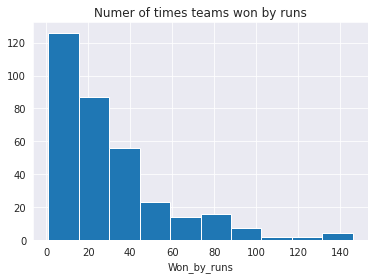

In [32]:
# Plotting Histogram
plt.hist(batting_first["win_by_runs"]);
plt.title("Numer of times teams won by runs")
plt.xlabel("Won_by_runs")

we can conclude from the above graph that more of 120 times teams won by less than 20 runs. And there is less than around 5 times the teams won by 140 runs or less.  

Here we will see which team has won most number of times. 

In [33]:
# Number of teams who won most number of times
teams_won = matches.winner.value_counts()
teams_won

Mumbai Indians                 109
Chennai Super Kings            100
Kolkata Knight Riders           92
Royal Challengers Bangalore     84
Kings XI Punjab                 82
Rajasthan Royals                75
Delhi Daredevils                67
Sunrisers Hyderabad             58
Deccan Chargers                 29
Rising Pune Supergiant          15
Gujarat Lions                   13
Pune Warriors                   12
Delhi Capitals                  10
Kochi Tuskers Kerala             6
Name: winner, dtype: int64

Here we can see why **Mumbai Indians(MI)** and **Chennai Super Kings(CSK)** are called the Champs of IPL with a whooping wins of more than 100 times.

Let plot it in a bar graph.

/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


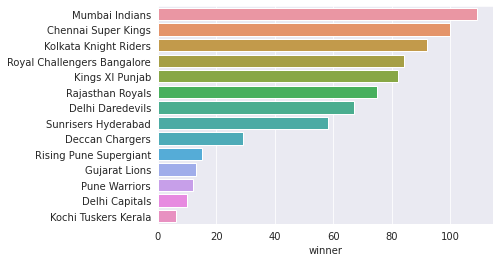

In [34]:
sns.barplot(teams_won, teams_won.keys());

Here's a important thing to notice is **Delhi Daredevils** was founded in 2008 but was changed to **Delhi Capitals** in 2018. Another thing is the team **Deccan Chargers** was terminated and **Sunrisers Hyderabad** was founded in 2012. 

So, after looking at these two factors we can see that the top 8 teams are active till now and the rest was either terminated or changed the names. 

Lets see which team has highest probability of winning after batting first. 
We will use the **batting_first** dataframe which we created before.

In [106]:
batting_first.winner.value_counts()

Mumbai Indians                 57
Chennai Super Kings            52
Kings XI Punjab                38
Kolkata Knight Riders          36
Royal Challengers Bangalore    35
Sunrisers Hyderabad            30
Rajasthan Royals               27
Delhi Daredevils               25
Deccan Chargers                18
Rising Pune Supergiant          7
Pune Warriors                   6
Delhi Capitals                  3
Kochi Tuskers Kerala            2
Gujarat Lions                   1
Name: winner, dtype: int64

Here can see that Mumbai Indians, Chennai Super Kings and Kings XI Punjab are the top 3 teams who have won when they batted first. So we can conclude that these teams has the highest probability of winning if they bat first. 

Let explore all the teams in a pie chart. **Since there are a 14 teams, the pie chart would be very disturbing to look with all of them. So we are going to simplify it by putting the last 6 teams into others (key).**

In [36]:
main_teams = batting_first.winner.value_counts()[:8]
other_teams_win_count = batting_first.winner.value_counts()[9:].sum()
main_teams["Others"] = other_teams_win_count
main_teams

Mumbai Indians                 57
Chennai Super Kings            52
Kings XI Punjab                38
Kolkata Knight Riders          36
Royal Challengers Bangalore    35
Sunrisers Hyderabad            30
Rajasthan Royals               27
Delhi Daredevils               25
Others                         19
Name: winner, dtype: int64

/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


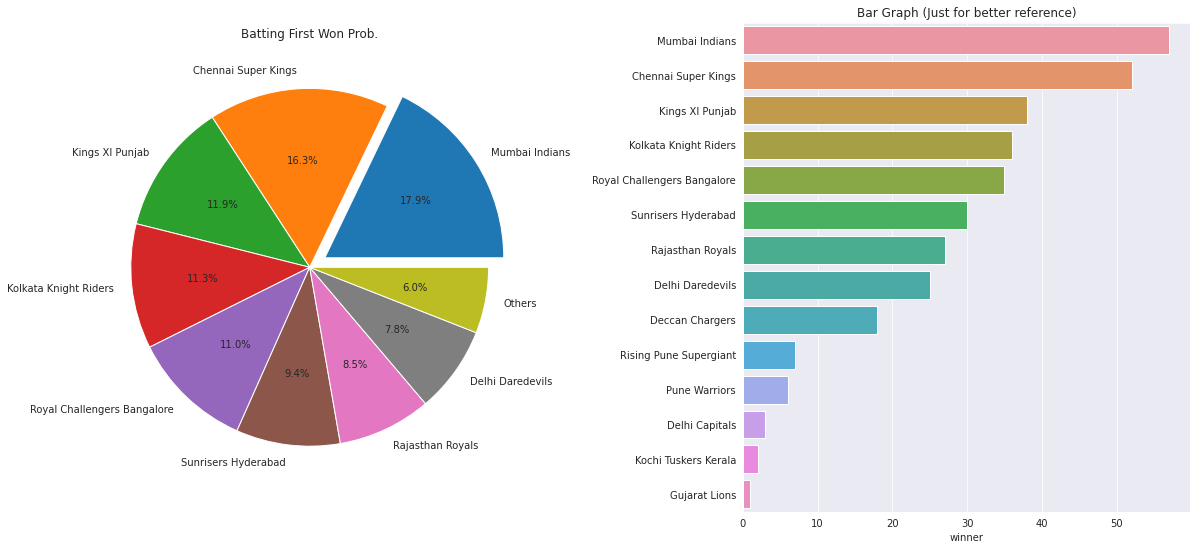

In [37]:
fig, axes = plt.subplots(1,2,figsize = (17,8))
# Making the pie chart (First argument will be the numerical value and then their heads)
explode = (0.1, 0, 0, 0, 0, 0, 0, 0, 0)
axes[0].set_title("Batting First Won Prob.")
axes[0].pie(main_teams, labels = main_teams.keys(), explode = explode, autopct = '%0.1f%%')
axes[1].set_title("Bar Graph (Just for better reference)")
sns.barplot(batting_first.winner.value_counts(),batting_first.winner.value_counts().keys(), ax = axes[1])

plt.tight_layout(pad = 2)
plt.show()

Looking at the pie chart, we can say that **18%** times **Mumbai Indians** won when they batted first closely followed up by  **Chennai Super Kings** with **16.3 %** times.

Lets look at the **cities** in which **most number of matches** were played in all season overall.

In [38]:
# Lets first look at the total no. of matches played in every cities combining all seasons
matches['city'].value_counts()

Mumbai            101
Kolkata            77
Delhi              74
Bangalore          66
Hyderabad          64
Chennai            57
Jaipur             47
Chandigarh         46
Pune               38
Durban             15
Bengaluru          14
Visakhapatnam      13
Ahmedabad          12
Centurion          12
Mohali             10
Rajkot             10
Indore              9
Dharamsala          9
Johannesburg        8
Ranchi              7
Dubai               7
Cuttack             7
Abu Dhabi           7
Port Elizabeth      7
Cape Town           7
Sharjah             6
Raipur              6
Kochi               5
Kanpur              4
Kimberley           3
Nagpur              3
East London         3
Bloemfontein        2
Name: city, dtype: int64

So, there are total of 33 cities in which **Mumbai** city has the highest number of matches played overall i.e 101 matches.

Lets plot this in the graph

/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


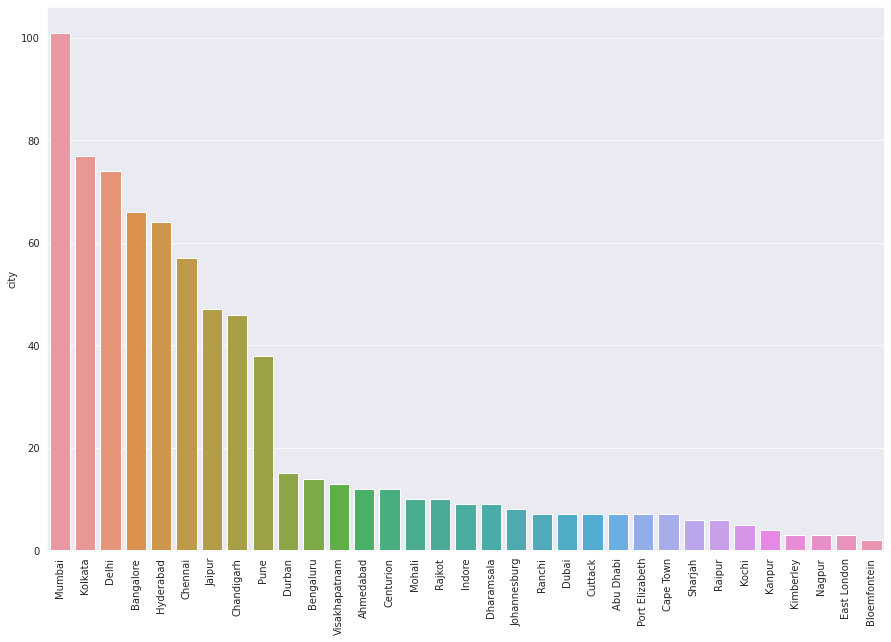

In [39]:
plt.figure(figsize = (15,10))
sns.barplot(matches.city.value_counts().keys(),matches.city.value_counts());
plt.xticks(rotation = 90);

Lets look for the best **player of the match** throughout every season and then combining all seasons.

In [40]:
#10 players with Most Man of the Match Award won combining all seasons
matches['player_of_match'].value_counts().head(10)

CH Gayle          21
AB de Villiers    20
DA Warner         17
MS Dhoni          17
RG Sharma         17
YK Pathan         16
SR Watson         15
SK Raina          14
G Gambhir         13
V Kohli           12
Name: player_of_match, dtype: int64

/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


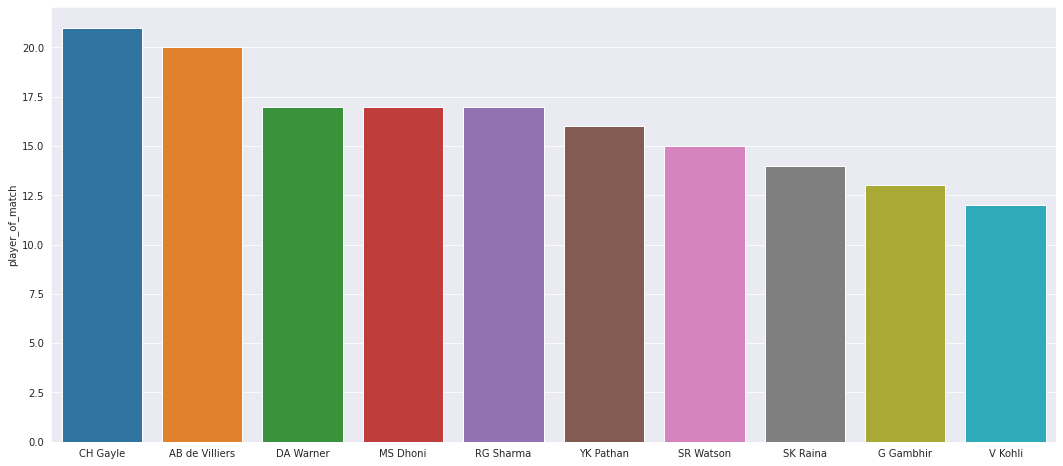

In [41]:
plt.figure(figsize = (18,8))
sns.barplot(matches['player_of_match'].value_counts().head(10).keys(), matches['player_of_match'].value_counts().head(10));

Here we can see that the most player of the match award was won by **Chris Gayle** combining all the seasons.

Let see season by season analysis for the most player of match.

In [42]:
# Data for every season for most player of match
player_of_match_season = matches.groupby('season')["player_of_match"].value_counts()
player_of_match_season

season  player_of_match
2008    SE Marsh           5
        SR Watson          4
        YK Pathan          4
        AC Gilchrist       2
        M Ntini            2
                          ..
2019    SL Malinga         1
        SPD Smith          1
        SS Iyer            1
        V Kohli            1
        VR Aaron           1
Name: player_of_match, Length: 514, dtype: int64

In [43]:
# Players who have won more than 3 times The Player of the Match Award for every season.
player_of_match_season[player_of_match_season>3]

season  player_of_match
2008    SE Marsh           5
        SR Watson          4
        YK Pathan          4
2010    SR Tendulkar       4
2011    CH Gayle           6
2012    CH Gayle           5
2013    MEK Hussey         5
        A Mishra           4
2014    GJ Maxwell         4
2015    DA Warner          4
2016    V Kohli            5
        AB de Villiers     4
        RG Sharma          4
2018    Rashid Khan        4
2019    AD Russell         4
Name: player_of_match, dtype: int64

As we can see from the anaysis that these are the players who have won more than 3 times per season the most player of the match award.

Lets look at our **deliveries** dataset and do analysis.

* Total wickets taken between different overs (Using dismissal_kind column)

In [44]:
# Looking the values in dismissal_kind column
deliveries.dismissal_kind.unique()

array(['notout', 'caught', 'bowled', 'run out', 'lbw',
       'caught and bowled', 'stumped', 'retired hurt', 'hit wicket',
       'obstructing the field'], dtype=object)

In [45]:
# Removing the 'notout', 'run out', 'retired hurt' rows and then grouping up the rest by overs
df = deliveries[(deliveries.dismissal_kind != 'notout')&(deliveries.dismissal_kind != 'run out')&(deliveries.dismissal_kind != 'retired hurt')]
df.over.value_counts()

20    676
18    621
19    608
17    489
16    458
15    413
14    397
5     365
11    361
4     356
6     355
13    350
3     346
12    344
9     336
2     322
10    313
8     297
1     284
7     279
Name: over, dtype: int64

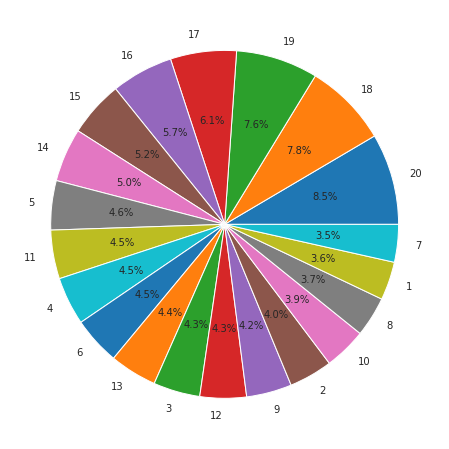

In [46]:
plt.figure(figsize=(10,8))
plt.pie(df.over.value_counts(),labels = df.over.value_counts().keys(), autopct = '%0.1f%%');

We can conclude that maximum number of wickets fall in the **last 5 overs** with last over has highest percentage of the fall of wickets.

## Asking and Answering Questions

We will ask few interesting questions, the answer to which will give us some insights and can be helpful for upcoming IPL's.

#### Q1: Find the Total runs scored by a different team in all seasons and Total runs scored by diffrent batsman.

* Total runs scored by a different team in all seasons and the graph.

In [49]:
# Total runs scored by a different teams in all seasons
deliveries.groupby(deliveries.batting_team).total_runs.sum()

batting_team
Chennai Super Kings            26418
Deccan Chargers                11463
Delhi Capitals                  2630
Delhi Daredevils               24388
Gujarat Lions                   4862
Kings XI Punjab                27893
Kochi Tuskers Kerala            1901
Kolkata Knight Riders          27419
Mumbai Indians                 29809
Pune Warriors                   6358
Rajasthan Royals               22431
Rising Pune Supergiant          2470
Rising Pune Supergiants         2063
Royal Challengers Bangalore    28126
Sunrisers Hyderabad            17059
Name: total_runs, dtype: int64

/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


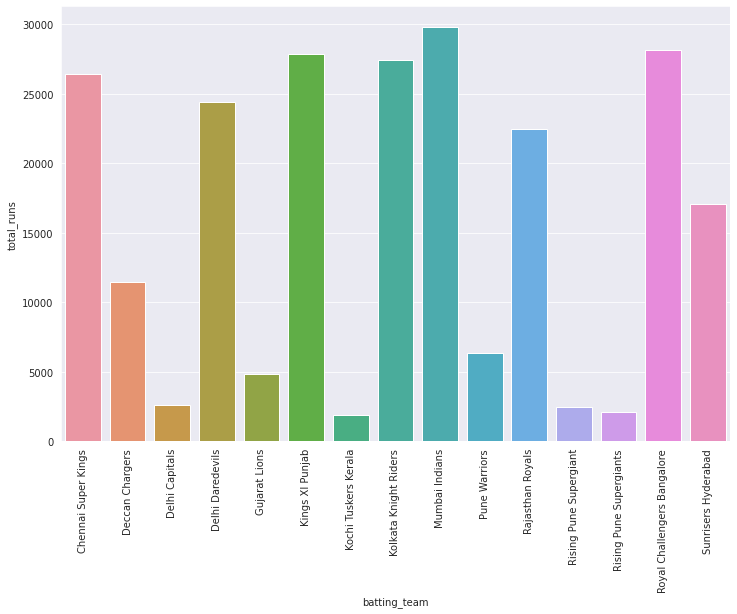

In [50]:
# bar plot the the above analysis for better vizualization
plt.figure(figsize = (12,8))
sns.barplot(deliveries.groupby(deliveries.batting_team).total_runs.sum().keys(),deliveries.groupby(deliveries.batting_team).total_runs.sum());
plt.xticks(rotation = 90);

* Total runs scored by different batsman

In [51]:
batsman_score_df = deliveries.groupby('batsman').batsman_runs.sum().sort_values(ascending=False)
# Top 10 batsman with maximum scores in IPL
batsman_score_df.head(10)

batsman
V Kohli           5434
SK Raina          5415
RG Sharma         4914
DA Warner         4741
S Dhawan          4632
CH Gayle          4560
MS Dhoni          4477
RV Uthappa        4446
AB de Villiers    4428
G Gambhir         4223
Name: batsman_runs, dtype: int64

/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


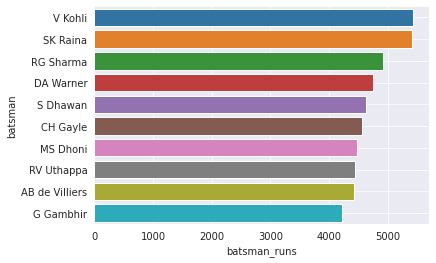

In [52]:
#lets put that in graph
sns.barplot(batsman_score_df.head(10),batsman_score_df.head(10).keys());
plt.grid(True)

These are the **top 10 batsman** of IPL with hightest scores in their pocket.

#### Q2: Find the Maximum Centuries scored by a batsman

In [53]:
# Gruoping by match and batsman to get the total score of every batsman in every match
runs_by_batsman = deliveries.groupby([deliveries.match_id,deliveries.batsman]).total_runs.sum()
# Create a dataframe of it by resetting the index
runs_df = pd.DataFrame(runs_by_batsman).reset_index()
# Taking all the batsman who have scored 100 runs in each match
runs_100_df = runs_df[runs_df.total_runs>=100]
# Grouping by batsman and count the number of times each scored a century and the sorting it and showing the top 10.
runs_100_df.groupby('batsman').total_runs.count().sort_values(ascending = False).head(10)

batsman
CH Gayle          10
V Kohli            6
SR Watson          5
DA Warner          5
KL Rahul           3
V Sehwag           3
AB de Villiers     3
AM Rahane          3
SK Raina           3
RG Sharma          2
Name: total_runs, dtype: int64

We can see that **Virat Kohli** is in the second position with **6 centuries** but has highest score in IPL. Only person above him in maximum centuries is the 'Master Hitter' **Chris Gayle** with **10 centuries**.

Let's **combine both dataset** and ask few questions according to that.

In [54]:
# Combining matches and deliveries dataset
combined_df = deliveries.set_index('match_id').join(matches.set_index('id'),how='inner')

#### Q3: Find the best batsman in the last 3 seasons of IPL (i.e. 2017,2018,2019) but season-wise

In [55]:
# Grouping by seaason and batsman and evaluating the total scores
batsman_score_season = combined_df.groupby(['season','batsman']).total_runs.sum()
batsman_score_season_df = pd.DataFrame(batsman_score_season).reset_index()
# Extracting the last 3 seasons from the created dataframe
best_batsman_df = batsman_score_season_df[batsman_score_season_df.season > 2016]
best_batsman_df

,season,batsman,total_runs
1388,2017,A Choudhary,25
1389,2017,A Mishra,55
1390,2017,A Zampa,5
1391,2017,AB Dinda,8
1392,2017,AB de Villiers,233
...,...,...,...
1808,2019,WP Saha,100
1809,2019,Washington Sundar,3
1810,2019,YK Pathan,46
1811,2019,YS Chahal,6


In [56]:
df1 = best_batsman_df[best_batsman_df.season == 2017].sort_values('total_runs',ascending = False).head(3)
df2 = best_batsman_df[best_batsman_df.season == 2018].sort_values('total_runs',ascending = False).head(3)
df3 = best_batsman_df[best_batsman_df.season == 2019].sort_values('total_runs',ascending = False).head(3)
best_batsman_3season_df = pd.concat([df1,df2,df3])
# best batsman in the last 3 seasons of IPL 
best_batsman_3season_df

,season,batsman,total_runs
1422,2017,DA Warner,670
1431,2017,G Gambhir,531
1495,2017,S Dhawan,495
1595,2018,KS Williamson,759
1637,2018,RR Pant,750
1593,2018,KL Rahul,697
1696,2019,DA Warner,762
1731,2019,KL Rahul,627
1765,2019,Q de Kock,576


/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


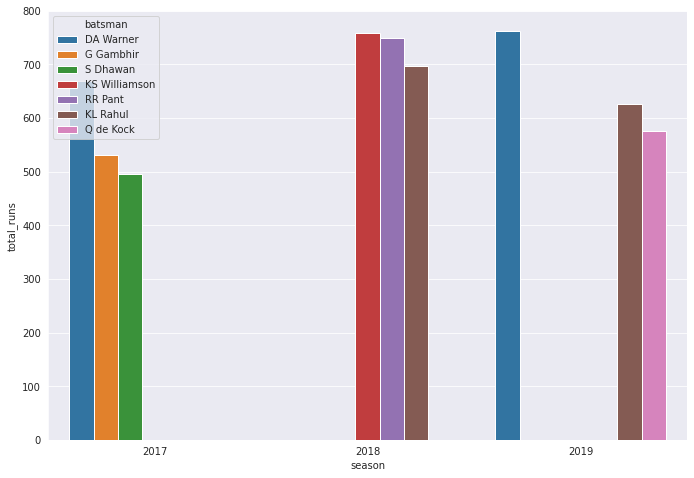

In [57]:
# Plotting in a bar graph season wise
plt.figure(figsize = (10,7))
sns.barplot(best_batsman_3season_df.season,best_batsman_3season_df.total_runs, hue = best_batsman_3season_df.batsman);
plt.tight_layout(pad = 2)

#### Q4: Find out the Best Wicket takers(Purple Cap Winner) in the last season of IPL i.e (2019)

In [58]:
# Extracting the dataframe where only wickets were taken (Except runout and retired hurt which usually doesnt count as wicket for bowlers)
df = combined_df[(combined_df.dismissal_kind != "run out") & (combined_df.dismissal_kind != "retired hurt") & (combined_df.dismissal_kind != "notout")]
# Grouping up by season and bowler and counting bowlers for wickets 
#(You can also count batsman, non-striker as they will yield the same result)
wicket = df.groupby(['season','bowler']).bowler.count()
# Top 5 bowlers with most wickets
wicket[2019].sort_values(ascending = False).head(5)

bowler
Imran Tahir    26
K Rabada       25
DL Chahar      22
S Gopal        20
K Ahmed        20
Name: bowler, dtype: int64

We can see that **Imran Tahir** was the **Purple Cap Winner of IPL 2019** with **26 wickets** in his hand closely following up **Kagiso Rabada** with **25 wickets** in hand.

#### Q5: Find out the best wicket keeper (in terms of stumping) in the last two seasons of IPL i.e. 2018,2019.

In [75]:
# Extract the two seasons(2018 & 2019) from the combined dataframe
last_two_df = combined_df[combined_df.season > 2017]
# Selecting the "stumped" dismissal_kind for the wicket_keeper
df = last_two_df[last_two_df.dismissal_kind == "stumped"]
# Polishing the dataframe by choosing only the necessary columns
stumped_df = df[["inning","season","fielder","bowler","batsman","dismissal_kind"]]  # Chose the dismissal_kind just to show in the dataframe

,inning,season,fielder,bowler,batsman,dismissal_kind
7894,2,2018,Ishan Kishan,M Markande,DL Chahar,stumped
7901,1,2018,Q de Kock,Washington Sundar,MP Stoinis,stumped
7901,1,2018,Q de Kock,YS Chahal,R Ashwin,stumped
7907,2,2018,not,M Markande,SN Khan,stumped
7908,1,2018,KD Karthik,N Rana,AM Rahane,stumped
7913,1,2018,WP Saha,Rashid Khan,F du Plessis,stumped
7917,2,2018,Q de Kock,YS Chahal,SW Billings,stumped
7925,2,2018,RR Pant,A Mishra,JC Buttler,stumped
7928,1,2018,MS Dhoni,Harbhajan Singh,AB de Villiers,stumped
7928,1,2018,MS Dhoni,Harbhajan Singh,M Ashwin,stumped


In [99]:
# Top 5 wicket_keepers who stumped in the season 2018
wic_keeper_2018 = stumped_df.groupby(['season','fielder']).fielder.count()[2018].sort_values(ascending = False).head(5)
# Top 5 wicket_keepers who stumped in the season 2019
wic_keeper_2019 = stumped_df.groupby(['season','fielder']).fielder.count()[2019].sort_values(ascending = False).head(5)

print("Wicket-Keepers of 2018 (who stumped) : ",wic_keeper_2018)
print("\n\nWicket-Keepers of 2019 (who stumped) : ",wic_keeper_2019)

Wicket-Keepers of 2018 (who stumped) :  fielder
H Klaasen     4
Q de Kock     3
MS Dhoni      3
KD Karthik    3
RR Pant       2
Name: fielder, dtype: int64


Wicket-Keepers of 2019 (who stumped) :  fielder
MS Dhoni      5
RR Pant       4
Q de Kock     2
PA Patel      2
J Bairstow    2
Name: fielder, dtype: int64


So, we can conclude by looking at both series that :

the **best wicket-keeper of 2018** IPL was **Heinrich Klaasen** with **4 wickets**(stump out), 

and the **best wicket keeper of 2019** IPL was **MS Dhoni** with **5 wickets**(stump out).

## Inferences and Conclusion


* There are two .csv files in the ipl_dataset i.e. matches.csv (match by match data) and deliveries.csv (ball by ball data). The matches.csv data has 18 features and 756 rows (Total number of matches) and deliveries.csv has the ball by ball data of every match and every happenings are divided into various feature sets(columns).

* Mumbai Indians(MI) and Chennai Super Kings(CSK) won more than 100 times with MI at 101 and CSK at 100 combining all the seasons of IPL till 2019. 

* Mumbai Indians, Chennai Super Kings and Kings XI Punjab are the top 3 teams who have won when they batted first. So we can conclude that these teams has the highest probability of winning if they bat first. 

* Mumbai, Kolkata, Delhi and Bangalore respectively are the 4 cities where most of the matches of IPL were played. 

* Chris Gayle won the most man of the match award combining all the seasons of IPL with 21 awards. AB de Villers is in the 2nd position with 20 awards. There is also the season wise analysis of the most man of match award.

* Best Batsmans of IPL till 2019 is Virat Kohli, SK Raina, RG Sharma with most runs scored. Interestingly all are Indian players.

## References and Future Work

* **References :**

Dataset collected from Kaggle : https://www.kaggle.com/nowke9/ipldata

Geeksforgeeks for library help : https://www.geeksforgeeks.org/

Pandas Library docs : https://pandas.pydata.org/docs/user_guide/index.html#user-guide

Few Articles : https://datatofish.com/convert-pandas-series-to-dataframe/ 
               https://jamesrledoux.com/code/group-by-aggregate-pandas/  (For Grouping related in pandas)
               


* **Future Work :**

The Dataset is cleaned, processed and analysed with visualizations for better understanding the dataset. This processed data can be used further for applying Machine Learning and Deep Learning Algorithms for predicting how the players perform in future IPL's.